In [1]:
import pandas as pd

In [32]:
df = pd.read_csv('6578c75d7f46a0b5eb5accb5_are_pop_filtered.csv')  # Change to your filename

25.128637, 55.054319
24.915940, 55.109498
25.249900, 55.451956
25.345714, 55.338095

In [33]:
# 1️⃣  Define the bounding box (min/max lat-long)
lat_min, lat_max = 24.915940, 25.345714
lon_min, lon_max = 55.054319, 55.451956

# 2️⃣  Build a boolean mask
mask = (
    df['lat'].between(lat_min, lat_max) &
    df['lng'].between(lon_min, lon_max)
)

# 3️⃣  Slice the DataFrame
dubai_df= df[mask].copy()

In [34]:
df=dubai_df

In [35]:
X = df[['lat','lng']].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
from sklearn.cluster import KMeans
k = 25
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen',
    'cadetblue', 'darkpurple', 'pink', 'gray', 'black'
]
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [37]:
# convert centers back to original scale
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['lat','lng'])
print(centers_df)


          lat        lng
0   25.173079  55.418724
1   24.993856  55.146672
2   25.087011  55.225367
3   25.275824  55.388489
4   25.197645  55.258692
5   25.321309  55.386242
6   25.007165  55.408611
7   25.005788  55.084547
8   25.038572  55.257022
9   25.314248  55.430985
10  25.224191  55.377100
11  25.045255  55.188697
12  25.155709  55.270585
13  25.170897  55.351707
14  25.243252  55.426103
15  25.082055  55.316222
16  24.978045  55.191754
17  25.144195  55.223419
18  24.956287  55.087178
19  25.109884  55.384804
20  25.248167  55.290564
21  25.214466  55.309297
22  25.059163  55.137934
23  25.273783  55.337011
24  25.105788  55.183152


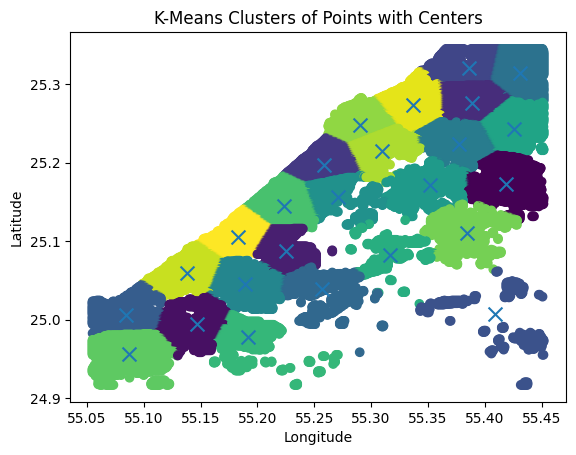

In [38]:
import matplotlib.pyplot as plt

# Assuming `df` has columns ['lat','lng','cluster']
# and `centers_df` is your DataFrame of cluster centers with ['lat','lng']

plt.figure()
# scatter all points, coloring by their assigned cluster
plt.scatter(df['lng'], df['lat'], c=df['cluster'])

# mark the cluster centers
plt.scatter(centers_df['lng'], centers_df['lat'], marker='x', s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clusters of Points with Centers')
plt.show()

# Weighted K-Means

In [65]:
from sklearn.cluster import KMeans

k=50

colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen',
    'cadetblue', 'darkpurple', 'pink', 'gray', 'black',
    'lightblue', 'lightgreen', 'lightgray', 'brown', 'white',
    'olive', 'teal', 'navy', 'gold', 'cyan'
]


X = df[['lat','lng']].values
w=df['pop'].values

kmeans_w = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_w.fit(X, sample_weight=w)         # pass your pop column here
labels = kmeans_w.predict(X)             # or just use kmeans.labels_
centers = kmeans_w.cluster_centers_

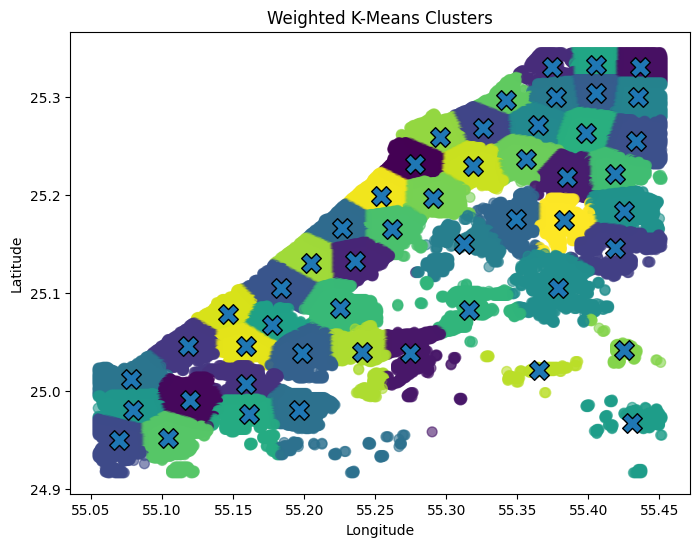

In [66]:
import matplotlib.pyplot as plt

# X[:,0]=lat, X[:,1]=lng
labels = kmeans_w.labels_
centers = kmeans_w.cluster_centers_

plt.figure(figsize=(8,6))
# plot each point colored by its cluster
plt.scatter(
    X[:,1], X[:,0],
    c=labels,
    s=50,
    alpha=0.6
)
# mark cluster centers
plt.scatter(
    centers[:,1], centers[:,0],
    marker='X',
    s=200,
    edgecolor='black'
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Weighted K-Means Clusters')
plt.show()


In [67]:
df_final = pd.DataFrame(
    X,
    columns=['lat','lng']
)
df_final['cluster'] = labels

print(df_final.head())

      lat        lng  cluster
0  25.345  55.365833        6
1  25.345  55.366666        6
2  25.345  55.367500        6
3  25.345  55.368333        6
4  25.345  55.369166        6


In [68]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[df['lat'].mean(), df['lng'].mean()],
    zoom_start=10
)

marker_cluster = MarkerCluster().add_to(m)

In [69]:
for idx, point in df_final.iterrows():
    c = int(point['cluster'])
    folium.Circle(
        location=(point['lat'], point['lng']),
        radius=1,
        color=colors[c % len(colors)],
        fill=True
    ).add_to(m)

for i in range(centers.shape[0]):
    # try both possible column names
    lat = centers[i][0]
    lng = centers[i][1]
    # build popup text
    popup = f"Center {idx}"
    folium.Marker(
        location=(lat, lng),
        icon=folium.Icon(color='black', icon='info-sign'),
        popup=popup
    ).add_to(m)

# 6️⃣ Save to HTML
m.save('dubai_50.html')